In [3]:
import numpy
import gtda.homology
import matplotlib.pyplot as plt

In [63]:
def plot(X: numpy.ndarray, threshold: float):
    print(X >= threshold)
    plt.imshow(1 - (X <= threshold), cmap = 'gray')

In [130]:
import numpy
import gtda.plotting
import matplotlib.pyplot as plt
import gudhi.sklearn.cubical_persistence

X = numpy.array([[
    [ 1, 1, 1, 1, 1, 1, 1 ],
    [ 1, 1, 2, 3, 4, 1, 1 ],
    [ 1, 1, 3, 1, 5, 1, 1 ],
    [ 1, 1, 4, 5, 6, 1, 1 ],
    [ 1, 1, 2, 3, 4, 1, 1 ],
    [ 1, 1, 3, 1, 5, 1, 1 ],
    [ 1, 1, 4, 5, 6, 1, 1 ],
    [ 1, 1, 1, 1, 1, 1, 1 ],
    [ 1, 1, 1, 1, 1, 1, 1 ]
]])

d = gudhi.sklearn.cubical_persistence.CubicalPersistence(
    homology_dimensions = list(range(0, 5)),
    min_persistence = -1
).fit_transform(X)

# gtda.plotting.plot_diagram(d[0])
diag = numpy.vstack([
    numpy.hstack([ d[0][0], numpy.zeros((len(d[0][0]), 1)) ]),
    numpy.hstack([ d[0][1], numpy.ones((len(d[0][1]), 1)) ])
])

gtda.plotting.plot_diagram(diag)

[[False False False False False False False]
 [False False False False  True False False]
 [False False False False  True False False]
 [False False  True  True  True False False]
 [False False False False  True False False]
 [False False False False  True False False]
 [False False  True  True  True False False]
 [False False False False False False False]
 [False False False False False False False]]


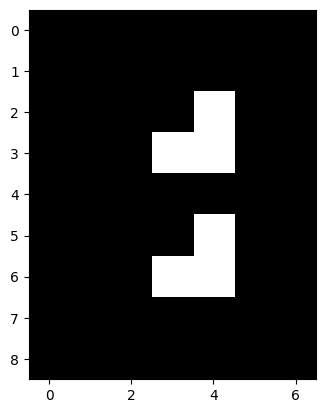

In [126]:
plot(X[0], 4)

In [67]:
import gtda.homology

gtda.homology.CubicalPersistence(
    homology_dimensions = list(range(0, 5)),
).fit_transform_plot(X)

100%|██████████| 1/1 [00:00<?, ?it/s]


array([[[5., 6., 0.],
        [0., 0., 1.],
        [0., 0., 2.],
        [0., 0., 3.],
        [0., 0., 4.]]])

[[[ 1  8  7]
  [ 4 20  6]
  [ 6  4  5]]]
(1, 3, 3)


100%|██████████| 1/1 [00:00<00:00, 963.10it/s]


[[False  True  True]
 [ True  True  True]
 [ True  True  True]]


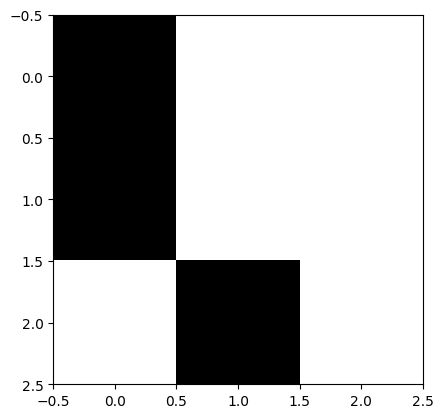

In [106]:


X = numpy.array([[
    [ 9, 9, 9, 9, 9 ],
    [ 9, 1, 4, 1, 9 ],
    [ 9, 9, 9, 9, 9 ]
]])

X = numpy.array([[
    [ 1, 8, 7 ],
    [ 4, 20, 6 ],
    [ 6, 4, 5 ]
]])

print(X)
print(X.shape)

gtda.homology.CubicalPersistence(
    homology_dimensions = list(range(0, 15)),
    reduced_homology = False,
).fit_transform_plot(X)
plot(X[0], 4)

100%|██████████| 1/1 [00:00<?, ?it/s]


[[ True  True  True  True  True]
 [ True False False False  True]
 [ True False  True  True  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]


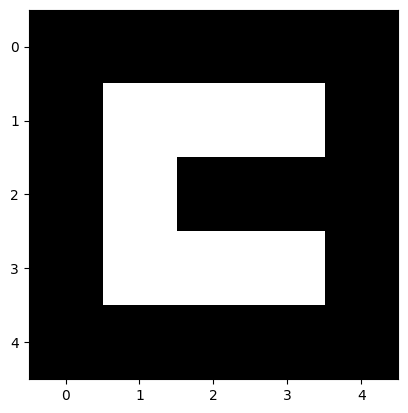

In [144]:
X = numpy.array([[
    [ 115, 119, 119, 119, 119 ],
    [ 115, 94, 94, 94, 114 ],
    [ 115, 94, 139, 100, 114 ],
    [ 115, 94, 99, 99, 114 ],
    [ 115, 117, 117, 117, 117 ]
]])

gtda.homology.CubicalPersistence(homology_dimensions = list(range(0, 5))).fit_transform_plot(X)
plot(X[0], 99)

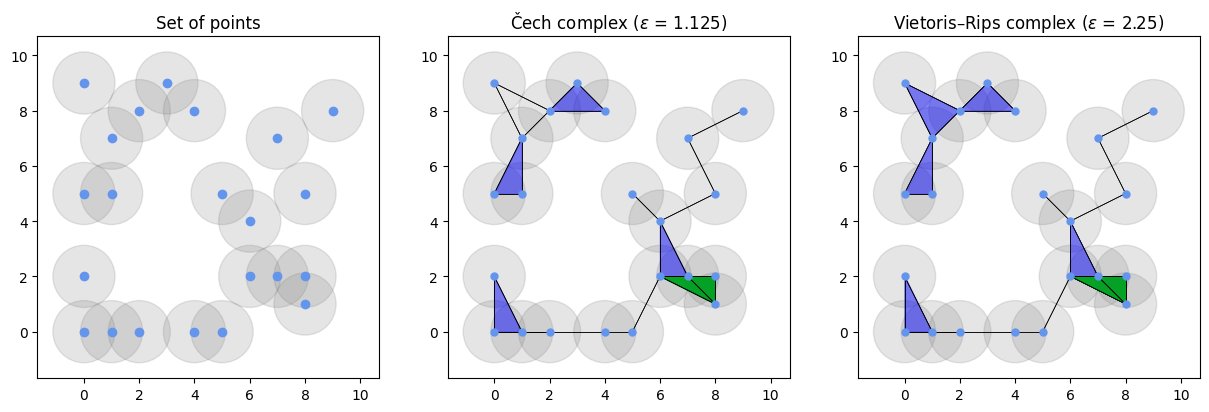

In [1]:
import numpy
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs

eps = 1.125
numpy.random.seed(6876)
homology_dimensions = [ 3, 4, 5, 2, 1 ]

points = numpy.random.randint(0, 10, (25, 2))
points = numpy.unique(points, axis = 0)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

def setup_axis(ax, points):
    ax.set_aspect('equal')
    for (x, y) in points:
        ax.add_patch(ptchs.Circle((x, y), eps, color = 'gray', alpha = 0.2))
    ax.scatter(points[:, 0], points[:, 1], alpha = 0)

def draw_simplex(ax, points):
    colors = [ None, 'cornflowerblue', 'black', (0, 0, 1, 0.1), (0, 0.75, 0, 0.1) ]
    color = colors[len(points)]
    if len(points) == 1:
        ax.scatter(points[0][0], points[0][1], 25, color = color)
    else:
        for pts in itertools.permutations(points):
            ax.add_patch(ptchs.Polygon(pts, color = color, linewidth = 0.5))


setup_axis(axes[0], points)
axes[0].set_title('Set of points')
axes[0].scatter(points[:, 0], points[:, 1], color = 'cornflowerblue')


setup_axis(axes[1], points)
axes[1].set_title(f'Čech complex ($\epsilon$ = {eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        pts = numpy.array(pts)
        xmin, xmax = numpy.min(pts[:, 0]), numpy.max(pts[:, 0])
        ymin, ymax = numpy.min(pts[:, 1]), numpy.max(pts[:, 1])
        if (xmax - xmin > 2 * eps) or (ymax - ymin > 2 * eps): continue
        x_range = numpy.arange(xmin - eps, xmax + eps, 0.01)
        y_range = numpy.arange(ymin - eps, ymax + eps, 0.01)
        for (c_x, c_y) in itertools.product(x_range, y_range):
            x_dist = (pts[:, 0] - c_x) ** 2
            y_dist = (pts[:, 1] - c_y) ** 2
            is_ok = (x_dist + y_dist) <= (eps ** 2)
            if (is_ok.all()):
                draw_simplex(axes[1], pts)
                break


setup_axis(axes[2], points)
axes[2].set_title(f'Vietoris–Rips complex ($\epsilon$ = {2 * eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        is_simplex = True
        for (x1, y1), (x2, y2) in itertools.product(pts, pts):
            dist = (x2 - x1) ** 2 + (y2 - y1) ** 2
            if dist > (2 * eps) ** 2:
                is_simplex = False
                break
        if is_simplex: draw_simplex(axes[2], pts)

In [4]:
import gtda.homology

gtda.homology.EuclideanCechPersistence(
    homology_dimensions = list(range(0, 6)),
    reduced_homology = False,
    coeff = 2,
    n_jobs = -1
).fit_transform_plot(numpy.array([ points ]))

array([[[0.        ,        inf, 0.        ],
        [0.        , 1.5       , 0.        ],
        [0.        , 1.11803401, 0.        ],
        [0.        , 1.11803401, 0.        ],
        [0.        , 1.11803401, 0.        ],
        [0.        , 1.11803401, 0.        ],
        [0.        , 1.11803401, 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.5       , 0.        ],
        [0.        , 0.5       , 0.        ],
        [0.        , 0.5       , 0.        ],
        [0.        , 0.5       , 0.        ],
        [0.        , 0.5       , 0.        ],
        [0.        , 0.5       , 0.        ],
        [0.        , 0.5       , 0

In [25]:
from gudhi import CubicalComplex
import numpy as np
cc = CubicalComplex(top_dimensional_cells=np.array([[ 1.,  8.,  7.],
                                                    [ 4., 20.,  6.],
                                                    [ 6.,  4.,  5.]]))
print(f"Cubical complex is of dimension {cc.dimension()} - {cc.num_simplices()} simplices.")
cc.compute_persistence()
cc.betti_numbers()

Cubical complex is of dimension 2 - 49 simplices.


[1, 0, 0]